### I will be importing my libarries

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importing the data set

In [3]:
df= pd.read_csv('plants.csv',index_col='Unnamed: 0')

### first look

In [4]:
df

,0,1
0,5657.0,10526:Menyanthaceae:P
1,9594.0,10399:Cyclanthaceae:P
2,138.0,10691:Myristicaceae:S
3,4339.0,10521:Limnanthaceae:P
4,9070.0,10902:Aphanopetalaceae:P~8777:Onagraceae:S
5,2520.0,9947:Resedaceae:P~10915:Annonaceae:S
6,3708.0,10989:Philydraceae:P~10540:Corsiaceae:P~10543:...
7,3287.0,8777:Achariaceae:S
8,5041.0,10689:Lactoridaceae:P
9,8802.0,10518:Drosophyllaceae:P


In [5]:
df.shape

(57, 2)

In [6]:
# renaming the columns
df.rename(columns={'0': 'id', '1': 'plant'},inplace=True)

In [7]:
#changing id's to int
df['id'] = df['id'].astype(int)

In [8]:
#looking to see if there are duplicates
df['id'].value_counts().head()

138     2
3708    1
2437    1
3893    1
1714    1
Name: id, dtype: int64

In [9]:
#since the information here is not duplicated I just left it be, I have code later on that drops duplicates
#person 138 is going to have 5 diffrent enteries anyways therefor I don't see the need of merging the two rows
df[df['id']==138]

,id,plant
2,138,10691:Myristicaceae:S
22,138,8781:Ceratophyllaceae:S~8777:Droseraceae:S~105...


In [10]:
# taking a look and see if there are any nulls
df.isnull().sum()

id       0
plant    6
dtype: int64

In [11]:
#I will drop the people who don't have any plants, as I don't think it makes sence to keep a tally of them, 
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace= True)

In [12]:
df.shape

(51, 2)

### I will regex the plant Id, name, and conditions and tally the number of plants per person

In [13]:
#first I need to seperate each plant, its condition and it's id
df=df.drop('plant', axis=1).join(df['plant'].str.split('~', expand=True).stack().reset_index(level=1, drop=True).rename('plant'))





In [14]:
# i will drop duplicates here 
df.drop_duplicates(keep='last',inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace= True)

In [15]:
#now I will index my plant column since it is what i will need to refrence 
index_plant=  df.columns.get_loc('plant')

In [16]:
# changing the : to spaces makes the job a bit easier so i will do that 
df['plant']=df['plant'].str.replace(":",' ')

In [17]:
# creating a new column for the plant Ids 
df['plant_id']= None
# getting the index for our new column so we can refrence it
index_plant_id= df.columns.get_loc('plant_id')
#setting the pattern of regex for plant_ids, I want all numbers
plant_id_pattern= r'\d+'
# looping to get all plant_ids per person and adding them to the new column i created up top
for row in range(0,len(df)):
    #to regex I need thepattern ii'm looking for, and the location I need to go look at, I will group them at the end so I have the numbers next to each other 
    plant_id= re.search(plant_id_pattern,df.iat[row,index_plant]).group() 
    #here i'm refrensing the index for the column I created and having the ids go in that column
    df.iat[row,index_plant_id]=plant_id
    


In [18]:
# doing what I did uptop for plant names now 
df['plant_name']=None
index_plant_name= df.columns.get_loc('plant_name')
# i want my names to be all alphabets, except for the alphabet that comes after the white spapce since tht is teh condition 
plant_name_pattern= r'[a-zA-Z]+[^\s]'
for row in range(0,len(df)):
    plant_name= re.findall(plant_name_pattern,df.iat[row,index_plant])                                          
    df.iat[row,index_plant_name]=plant_name
#changing the list to string, since .gropu() gave me an error and I would very much like my datapoints to be hashable
df['plant_name'] = [','.join(map(str, l)) for l in df['plant_name']]




In [19]:
#and doing it once more to get the conditions
df['plant_condition']=None
index_plant_condition= df.columns.get_loc('plant_condition')
#getting the last stand alone character as it is the condition
plant_condition_pattern= r'.\Z'
for row in range(0,len(df)):
    plant_condition= re.findall(plant_condition_pattern,df.iat[row,index_plant])                                                 
    df.iat[row,index_plant_condition]=plant_condition

df['plant_condition'] = [','.join(map(str, l)) for l in df['plant_condition']]




In [20]:
df.replace(['',' '], np.NaN, inplace=True)


In [21]:
df.isna().sum()

id                 0
plant              0
plant_id           0
plant_name         1
plant_condition    1
dtype: int64

In [22]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace= True)

In [23]:
df.plant_condition.unique()

array(['P', 'S', 'Q'], dtype=object)

In [24]:
# since i'm assuming that this is a large data set I will subtract number of plant names from it's value counts to get repeated plant names
plants_names_repeated= len(df['plant_name'])-len(df['plant_name'].value_counts())
plants_names_repeated

1

In [25]:
#and will do the same for the plant ids 
plant_ids_repleated= len(df['plant_id'])-len(df['plant_id'].unique())
plant_ids_repleated

21

#### I really don't know what would be asmart move regarding the plant Ids, since removing 21 data points from 72 is 29.17% of my data, and I don't feel comfortable deleting doseespesially since only one of the pant names is a repeat, therefore I might drop the entire column

In [26]:
df.drop(columns='plant_id',inplace=True)

In [27]:
df['plant_condition'].value_counts()
#two of the plant conditions are incorrect

P    37
S    35
Q     1
Name: plant_condition, dtype: int64

#### i think Q was supposed to be P since they come after one another in the alphabet however, they are very far from one another on the keyboard so it's hard to tell of that would be a valid mistake, Q is closer to S on the keyboard, but also not it's immedietae neighbor so i won't be changing it to either of the conditions, since i'm assuimg that this is a very big data set I think it would be safe to drop the unaaceptable conditions



In [28]:
df= df[df['plant_condition'].isin(['P','S'])]

In [29]:
#getting plant per person count and adding it to a column
count = df['id'].value_counts()
count_dic= count.to_dict()
df['counts'] = df['id'].map(count_dic) 

In [30]:
#rearrenging the columns to look better 
df = df[['id','plant_name','plant_condition','counts']]

In [31]:
#sorting the dataframe so people who have the most plants are on top
df=df.sort_values(by=['counts'], ascending=False)

In [32]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace= True)

In [37]:
#exporting the dataframe as a csv file 
df.to_csv('data-based-on-number-of-plants.csv')

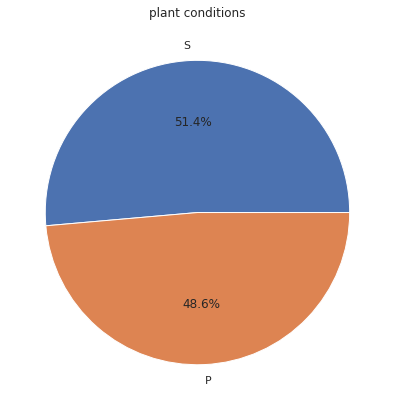

In [38]:
#plotting plant conditions on a pie chart
fig = plt.figure(figsize =(10, 7))

data =df['plant_condition'].value_counts()
plt.pie(data,labels=df['plant_condition'].unique(),autopct='%1.1f%%')
plt.title("plant conditions");


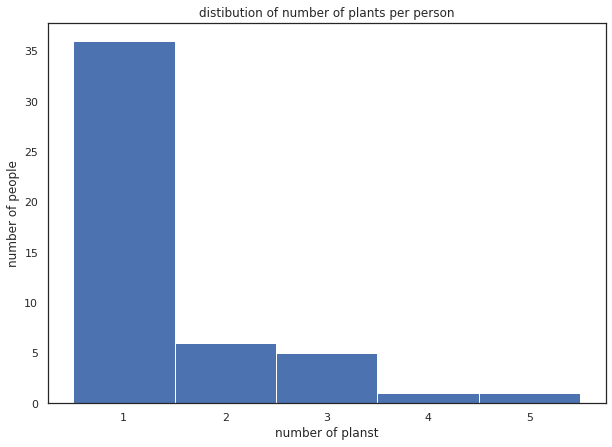

In [39]:
# virtualizing the distribution of number of plants each person has 
fig = plt.figure(figsize =(10, 7))
plt.title('distibution of number of plants per person')
plt.hist(df['id'].value_counts(),bins=5,range=(1,6), align='left')
plt.xlabel("number of planst")
plt.ylabel("number of people");
# obviosly most people pnly have 1 plant 
# only one person has 5 plants, and 4
#5<4<3<2<1

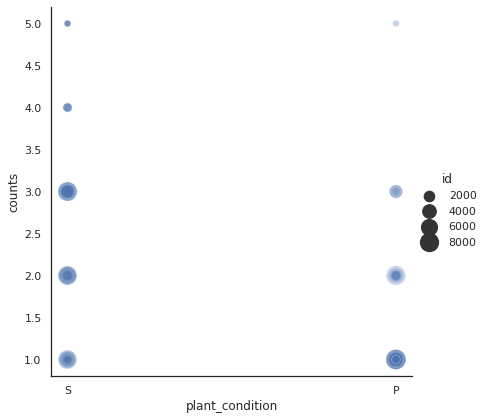

In [40]:
#condition between having more plants and 
sns.set_theme(style="white")

sns.relplot(x="plant_condition", y="counts", size=df['id'],
            sizes=(40, 400), alpha=.3,
            height=6, data=df);
#people who have more than 1 plant mostly have condistion s, people who only have one plant mostly have condition p 